>## <b> Practice Project : 3. Red Wine Quality Prediction</b>
<b><em> By: Ms. Yashshree bawiskar </em></b>

<b><em> Batch: 1838 </em></b>

> ### **Problem Statement:**

**The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).**

**This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.**
***
> #### **Attribute Information**

**Input variables (based on physicochemical tests):**

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

Output variable (based on sensory data):

12 - quality (score between 0 and 10)

**What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.**

***You need to build a classification model.*** 


**Inspiration**

Use machine learning to determine which physiochemical properties make a wine 'good'!

**Downlaod Files:**

https://github.com/dsrscientist/DSData/blob/master/winequality-red.csv

In [1]:
#Importing warning library to avoid any warnings
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing dataset excel file using pandas.
df=pd.read_csv('winequality-red.csv') 

In [4]:
print('No. of Rows :',df.shape[0])
print('No. of Columns :',df.shape[1])
pd.set_option('display.max_columns',None) # # This will enable us to see truncated columns
df.head()

No. of Rows : 1599
No. of Columns : 12


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [6]:
print("Shape of Red Wine dataset: {s}".format(s = df.shape))
print("Column headers/names: {s}".format(s = list(df)))

Shape of Red Wine dataset: (1599, 12)
Column headers/names: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


#### Observation: 
- **This dataset contain 1599 rows and 12 columns.**
- **In this dataset our objective is to predict quality of wine into good & bad. For that purpose we have to perform feature extraction to create two class for wine.**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


##### ***We can see that, all 12 columns are of numeric data types. Out of 12 variables, 11 are predictor variables and last one 'quality' is an response variable.***

#### Statstical Matrix

In [9]:
display('Table 1: Summary of Continous features')
display(df.describe(include=['int64','float64']).T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu'))

'Table 1: Summary of Continous features'

#### Key Observations:

- The summary of Red Wine dataset looks perfect, there is no visible abnormality in data (invalid/negative values).
- All the data seems to be in range (with different scales, which needs standardization).
- The mean is more than median (50th Percentile)in all columns
-  There is a large difference in 75th percentile and max in residul sugar, free sulfur dioxide , total sulfur dioxide which suggest that there are extrme outliers present in these three columns.

***Target /dependent variable is dicrete and cattegorical in nature***

***quality score scale ranges from 3 to 8; where 3 is low qaulity and 8 is best***

In [10]:
means = pd.pivot_table(data=df, index='quality',aggfunc={'fixed acidity':np.mean, 'volatile acidity':np.mean, 'citric acid':np.mean, 
                                                     'residual sugar':np.mean,'chlorides':np.mean,
                                                     'free sulfur dioxide':np.mean,'density':np.mean,'pH':np.mean,'sulphates':np.mean,'alcohol':np.mean})
means

alcohol  chlorides  citric acid   density  fixed acidity  \
quality                                                               
3         9.955000   0.122500     0.171000  0.997464       8.360000   
4        10.265094   0.090679     0.174151  0.996542       7.779245   
5         9.899706   0.092736     0.243686  0.997104       8.167254   
6        10.629519   0.084956     0.273824  0.996615       8.347179   
7        11.465913   0.076588     0.375176  0.996104       8.872362   
8        12.094444   0.068444     0.391111  0.995212       8.566667   

         free sulfur dioxide        pH  residual sugar  sulphates  \
quality                                                             
3                  11.000000  3.398000        2.635000   0.570000   
4                  12.264151  3.381509        2.694340   0.596415   
5                  16.983847  3.304949        2.528855   0.620969   
6                  15.711599  3.318072        2.477194   0.675329   
7                  14.045226  3.290754        2.720603   0.741256   
8                  13.277778  3.267222        2.577778   0.767778   

         volatile acidity  
quality                    
3                0.884500  
4                0.693962  
5                0.577041  
6                0.497484  
7                0.403920  
8                0.423333

#### Observation :
- **As the wine quality increase correspondingly the amount of chlorides,pH,residual sugar and volatile acidity decreases.**
- **With increase in quality of wine there is increase in amount of Citric acid & Sulphates.

**lets check that is there any missing data available or not**

In [11]:
df.isnull().sum().any()

False

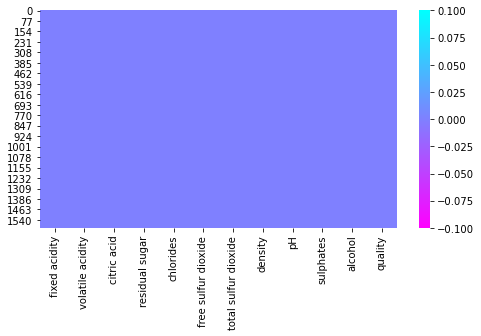

In [13]:
# Heatmap of Missing value 
plt.figure(figsize = (8,4))
sns.heatmap(df.isnull(), cmap='cool_r')
plt.show()

**In missing value heatmap clearly shows no missing value in the given data set.**


## EDA

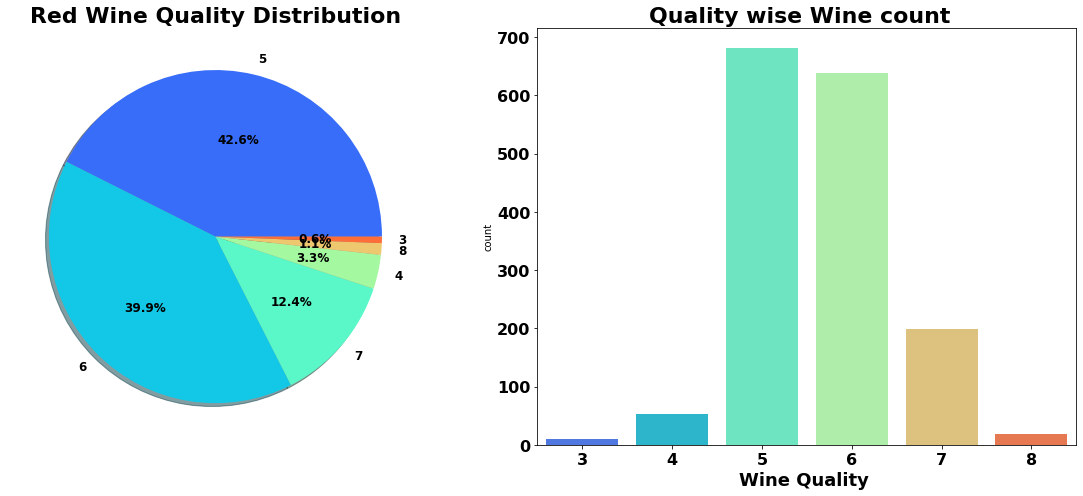

Value Count of Abalone Gender-wise


5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [16]:
# Exploration of quality of wine
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow')
f,ax=plt.subplots(1,2,figsize=(16,7))
df['quality'].value_counts().plot.pie(autopct='%2.1f%%',
                            textprops ={ 'fontweight': 'bold','fontsize':12}, ax=ax[0],shadow=True)
ax[0].set_title('Red Wine Quality Distribution', fontsize=22,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('quality', data=df,ax=ax[1])
ax[1].set_title('Quality wise Wine count  ',fontsize=22,fontweight ='bold')
ax[1].set_xlabel("Wine Quality ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.show()
print('='*100)
print('Value Count of Abalone Gender-wise')
df['quality'].value_counts()

#### Observation:
- **Out of all wine grade around 42.6% of red wine sample belong to grade 5 followed by 39.9% red wine sample belong to grade 6.**
- **Only 18 wine sample belong to Grade 8 which is highest quality wine among all.**
- **Only 10 wine sample belong to grade 3 and 53 wine sample belong to grade 4, both which are comparetively bad quality wine compare to rest.**

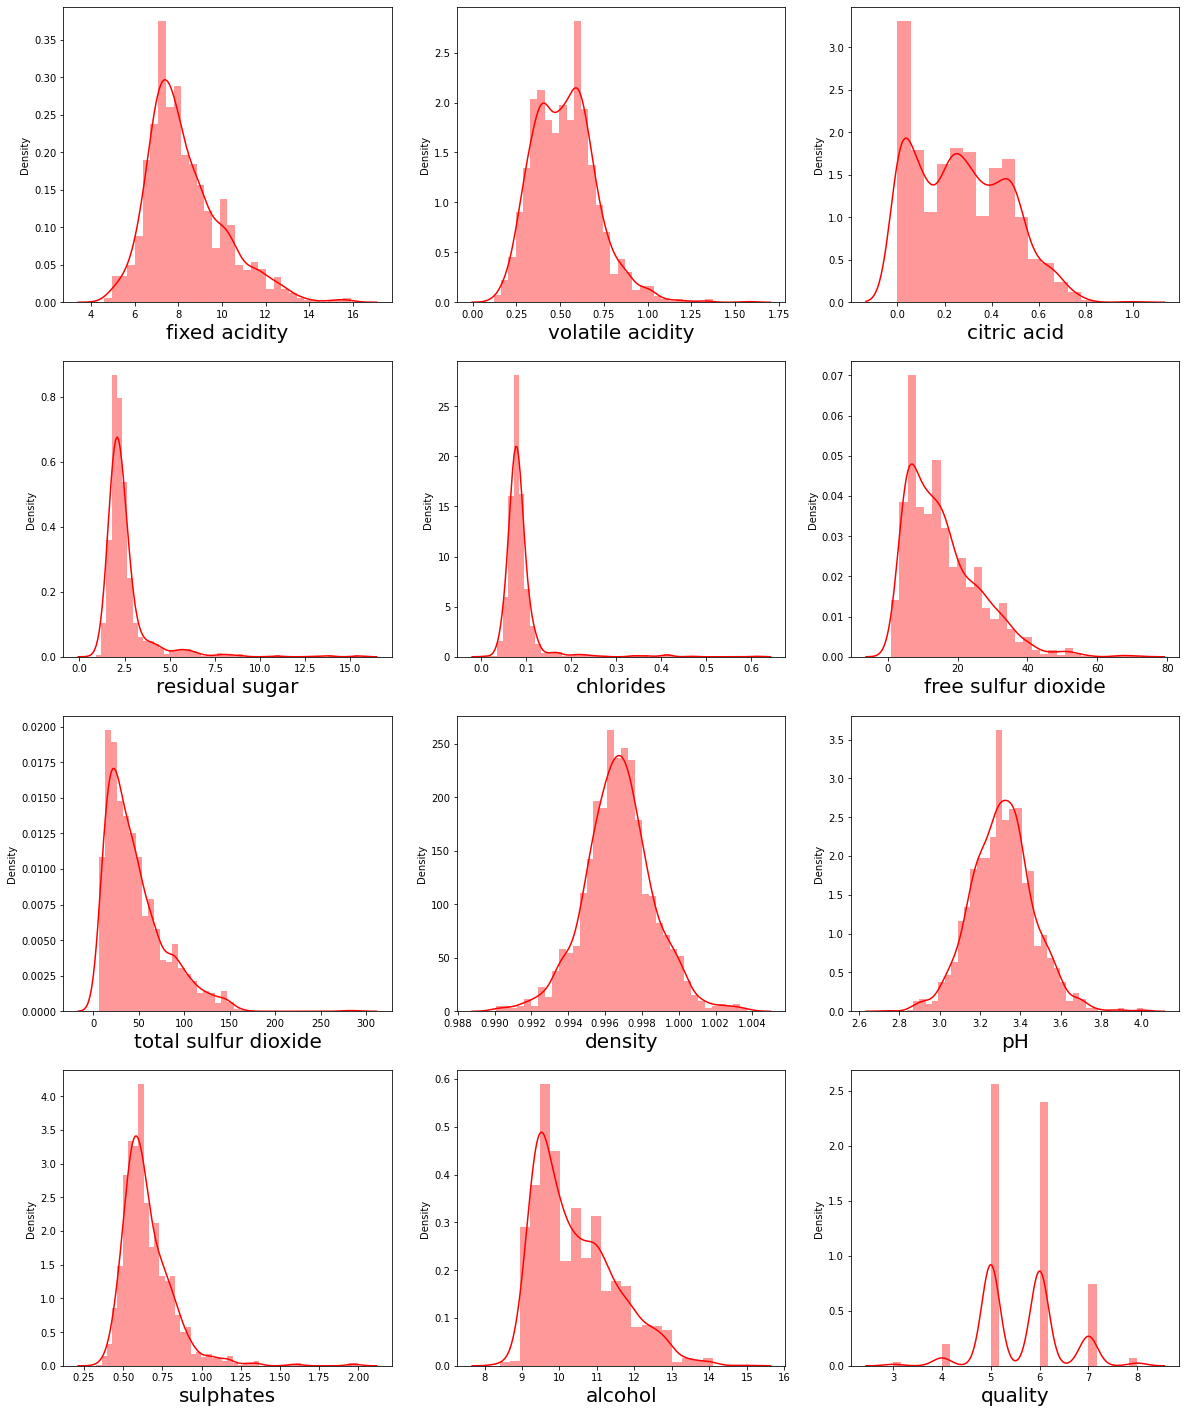

In [20]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber =1
for column in df:
    if plotnumber <=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df[column], color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

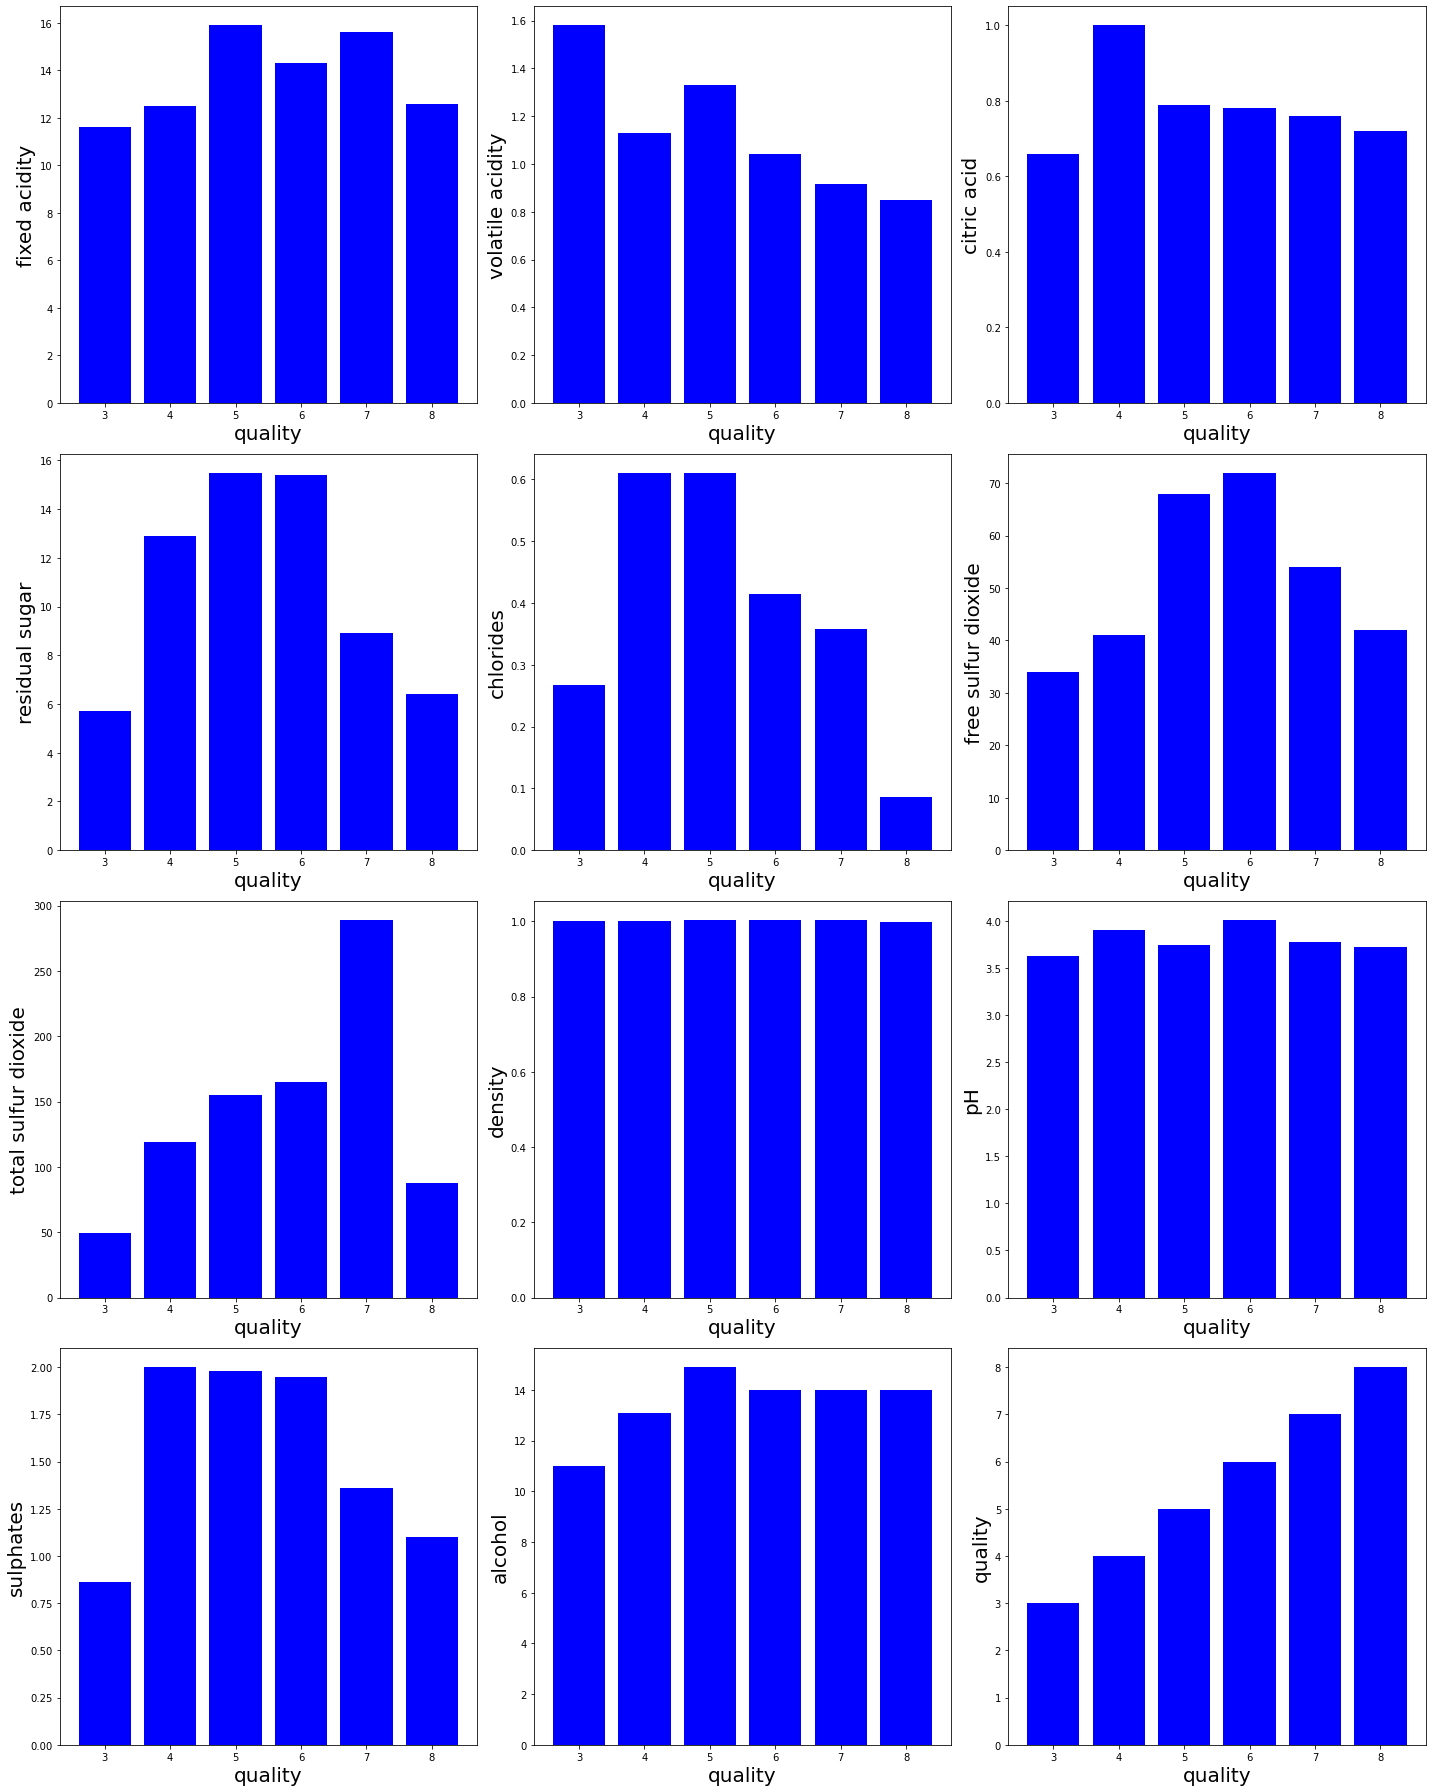

In [17]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber =1
for column in df:
    if plotnumber <=12:
        ax = plt.subplot(4,3,plotnumber)
        plt.bar(df['quality'], df[column], color='b') 
        plt.xlabel('quality',fontsize=20)
        plt.ylabel(column, fontsize =20)
    plotnumber+=1
plt.tight_layout()
plt.show()

#### Observation:
- Good quality (grade 7 & 8) of wine posses **more than 14 unit of alcohol, fixed acidity.**
- **Good quality (grade 7 & 8) of wine** posses **low amount of low volatile acidity.**
- Good quality (grade 7 & 8) of wine posses moderate amount of free sulfur dioxide in range of 14-16.
- **No significant relationship of Density and residual sugar with quality of wine.**
- Low grade quality of wine posses **lower amount of total sulfer dioxide compare to rest quality grade.**
- **Higher volatile acid lower the quality of wine.**

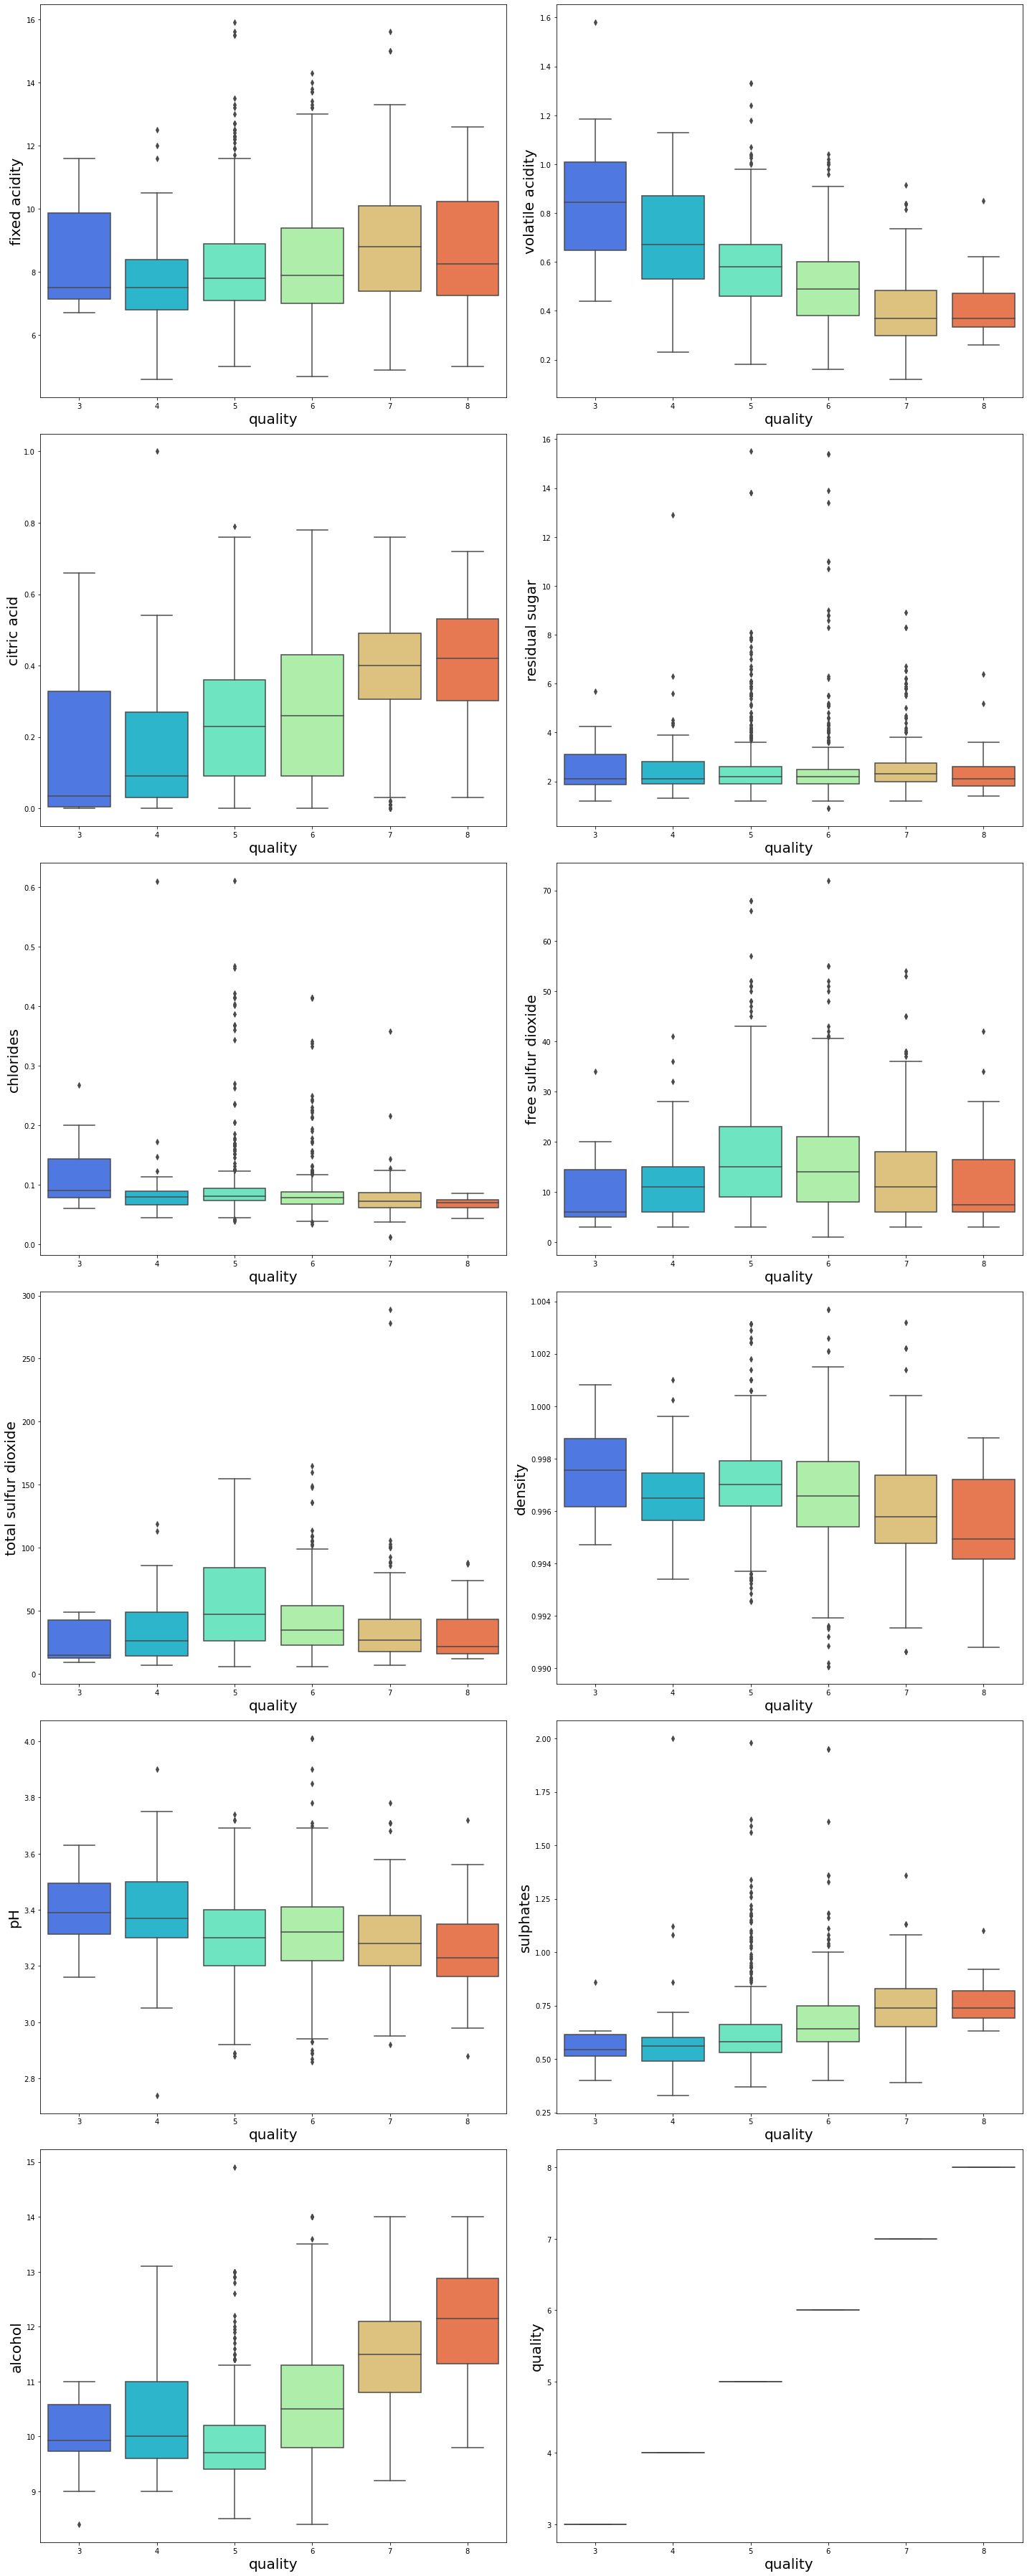

In [18]:
plt.figure(figsize=(20,50), facecolor='white')
plotnumber =1
for column in df:
    if plotnumber <=12:
        ax = plt.subplot(6,2,plotnumber)
        sns.boxplot(df['quality'],df[column]) 
        plt.xlabel('quality',fontsize=20)
        plt.ylabel(column, fontsize =20)
    plotnumber+=1
plt.tight_layout()
plt.show()

#### Observation:
- **With increase in quality there is sight decrease in density of wine.**
- **The amount of alcohol increases as wine grade increases.**
- **Average pH value, volatile acidity & average chlorides content decreases with increase in quality of wine.**
- **Average sulphates & citric acid content increases with increase in quality of wine.**
- **High amount of residual sugar & free sulfur dioxide observe in grade 5 and 6 wine.**

**Converting numerical value to catogorical value of Target Variables**
- bad: 1-4
- average: 5-6
- good: 7-10

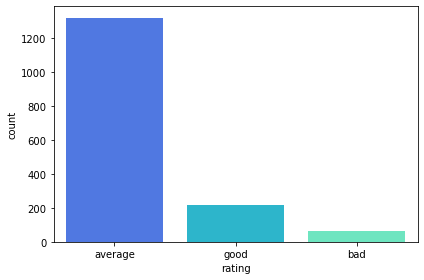

In [19]:
conditions = [(df['quality'] >= 7),(df['quality'] <= 4)]
rating = ['good', 'bad']
df['rating'] = np.select(conditions, rating, default='average')
df.rating.value_counts()
sns.countplot(x='rating', data=df)
plt.show()

In [25]:
df.groupby('rating').mean()

fixed acidity  volatile acidity  citric acid  residual sugar  \
rating                                                                  
average       8.254284          0.538560     0.258264        2.503867   
bad           7.871429          0.724206     0.173651        2.684921   
good          8.847005          0.405530     0.376498        2.708756   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
rating                                                                    
average   0.088973            16.368461             48.946929  0.996867   
bad       0.095730            12.063492             34.444444  0.996689   
good      0.075912            13.981567             34.889401  0.996030   

               pH  sulphates    alcohol   quality  
rating                                             
average  3.311296   0.647263  10.252717  5.483700  
bad      3.384127   0.592222  10.215873  3.841270  
good     3.288802   0.743456  11.518049  7.082949

In [26]:
df.groupby('rating').max()

fixed acidity  volatile acidity  citric acid  residual sugar  \
rating                                                                  
average           15.9             1.330         0.79            15.5   
bad               12.5             1.580         1.00            12.9   
good              15.6             0.915         0.76             8.9   

         chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
rating                                                                         
average      0.611                 72.0                 165.0  1.00369  4.01   
bad          0.610                 41.0                 119.0  1.00100  3.90   
good         0.358                 54.0                 289.0  1.00320  3.78   

         sulphates  alcohol  quality  
rating                                
average       1.98     14.9        6  
bad           2.00     13.1        4  
good          1.36     14.0        8

In [27]:
df.groupby('rating').max()

fixed acidity  volatile acidity  citric acid  residual sugar  \
rating                                                                  
average           15.9             1.330         0.79            15.5   
bad               12.5             1.580         1.00            12.9   
good              15.6             0.915         0.76             8.9   

         chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
rating                                                                         
average      0.611                 72.0                 165.0  1.00369  4.01   
bad          0.610                 41.0                 119.0  1.00100  3.90   
good         0.358                 54.0                 289.0  1.00320  3.78   

         sulphates  alcohol  quality  
rating                                
average       1.98     14.9        6  
bad           2.00     13.1        4  
good          1.36     14.0        8

### Analysis of alcohol percentage with wine quality:

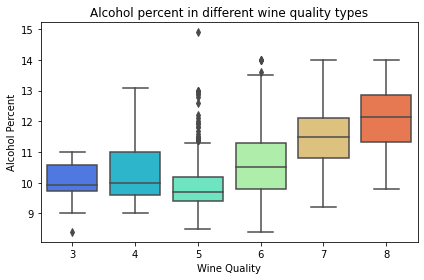

In [22]:
WN = sns.boxplot(x="quality", y='alcohol', data =df)
WN.set(xlabel='Wine Quality', ylabel='Alcohol Percent', 
       title='Alcohol percent in different wine quality types')
plt.show()

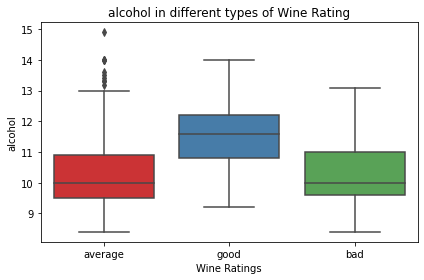

In [23]:
sns.set_palette('Set1')
WN = sns.boxplot(x="rating", y='alcohol', data = df)
WN.set(xlabel='Wine Ratings', ylabel='alcohol', title='alcohol in different types of Wine Rating')
plt.show()

**Good quality wine comes with higher amount of alcohol.**

### Analysis of sulphates & wine ratings:

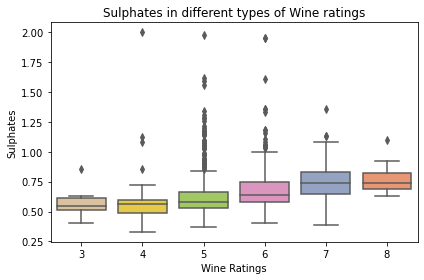

In [24]:
sns.set_palette('Set2_r')
WN = sns.boxplot(x="quality", y='sulphates', data = df)
WN.set(xlabel='Wine Ratings', ylabel='Sulphates', title='Sulphates in different types of Wine ratings')
plt.show()

### Analysis of Citric Acid & wine ratings:

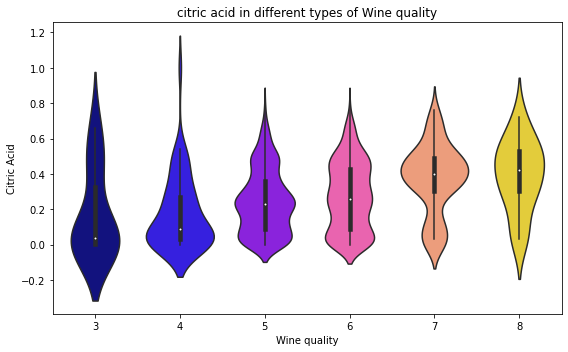

In [27]:
sns.set_palette('gnuplot2')
plt.figure(figsize=(8,5))
WR= sns.violinplot(x="quality", y='citric acid', data = df)
WR.set(xlabel='Wine quality', ylabel='Citric Acid', title='citric acid in different types of Wine quality')
plt.show()

### Analysis of fixed acidity & wine ratings:

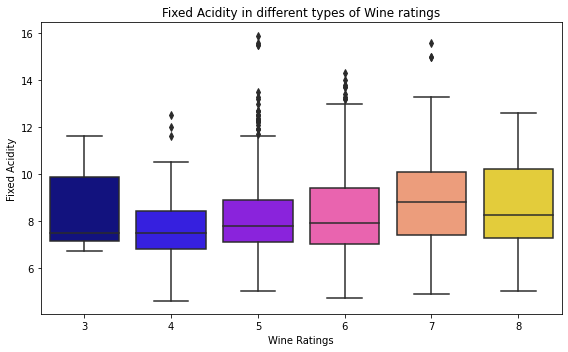

In [28]:
sns.set_palette('gnuplot2')
plt.figure(figsize=(8,5))
WR = sns.boxplot(x="quality", y='fixed acidity', data = df)
WR.set(xlabel='Wine Ratings', ylabel='Fixed Acidity', 
       title='Fixed Acidity in different types of Wine ratings')
plt.show()

### Analysis of pH & wine ratings:

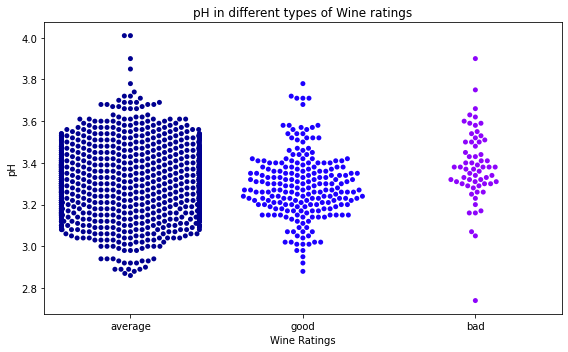

In [29]:
sns.set_palette('gnuplot2')
plt.figure(figsize=(8,5))
PH = sns.swarmplot(x="rating", y="pH", data = df);
PH.set(xlabel='Wine Ratings', ylabel='pH', title='pH in different types of Wine ratings')
plt.show()

**Linear Regression:**
- Below graphs for different quality ratings shows a linear regression between residual_sugar & alcohol in red wine,

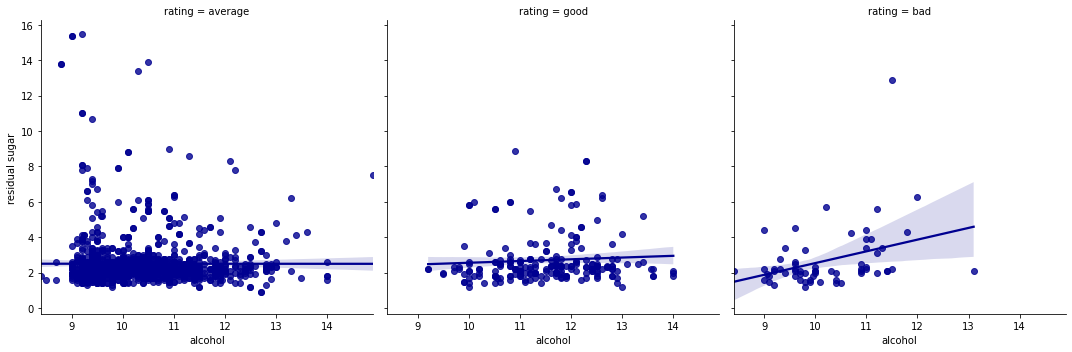

In [30]:
sns.lmplot(x = "alcohol", y = "residual sugar", col = "rating", data = df)

**Above plots shows us a linear regression between residual_sugar & alcohol in red wine in the diffrent quality**

- The linear regression plots above for different wine quality ratings (bad, average & good) shows the regression between alcohol and residual sugar content of the red wine.
- We can observe from the trendline that, for good and average wine types the residual sugar content remains almost constant irrespective of alcohol content value. Whereas for bad quality wine, the residual sugar content increases gradually with the increase in alcohol content.
- This analysis can help in manufacturing the good quality wine with continuous monitoring and contrilling the alcohol and residual sugar content of the red wine.

- **The above plot shows the higher probability for red wine quality will be good if alcohol percentage is more than equal to 12, whereas the same probability reduces as alcohol percentage decreases.**

- The above wine quality vs alcohol content regression model's result shows that, the minimum value for quality is 1.87 and there will be increment by single unit for wine quality for every change of 0.360842 alcohol units.

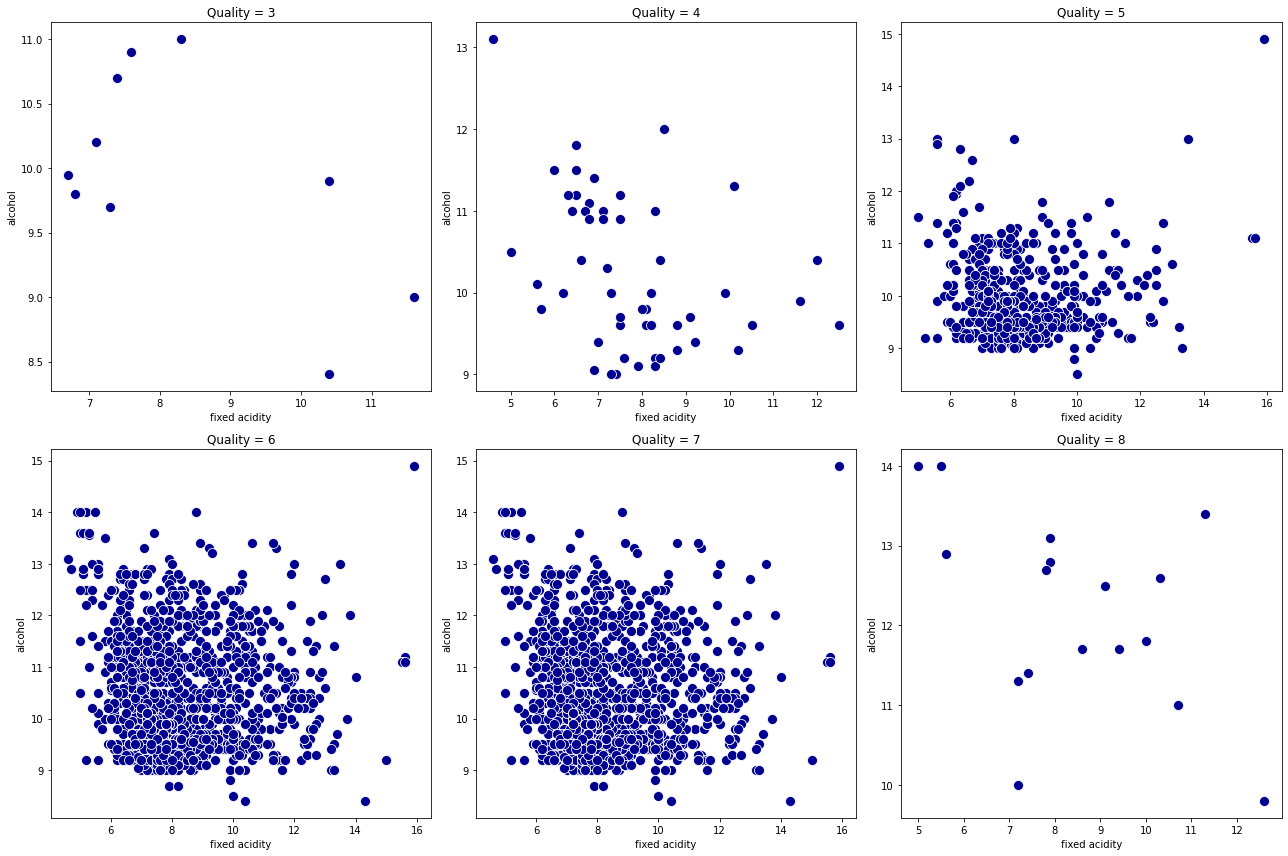

In [34]:
fig, axes = plt.subplots(2,3, figsize =(18,12))

axes[0,0].set_title('Quality = 3')
quality_df = df[df.quality==3]
sns.scatterplot(x='fixed acidity',y='alcohol',data = quality_df, s=100, ax= axes[0,0]);

axes[0,1].set_title('Quality = 4')
quality_df = df[df.quality==4]
sns.scatterplot(x='fixed acidity',y='alcohol',data = quality_df, s=100, ax= axes[0,1]);

axes[0,2].set_title('Quality = 5')
quality_df = df[df.quality==5]
sns.scatterplot(x='fixed acidity',y='alcohol',data = quality_df, s=100, ax= axes[0,2]);


axes[1,0].set_title('Quality = 6')
quality_df = df[df.quality==6]
sns.scatterplot(x='fixed acidity',y='alcohol',data = df, s=100, ax= axes[1,0]);

axes[1,1].set_title('Quality = 7')
quality_df =df[df.quality==7]
sns.scatterplot(x='fixed acidity',y='alcohol',data = df, s=100, ax= axes[1,1]);

axes[1,2].set_title('Quality = 8')
quality_df = df[df.quality==8]
sns.scatterplot(x='fixed acidity',y='alcohol',data = quality_df, s=100, ax= axes[1,2]);
plt.tight_layout()

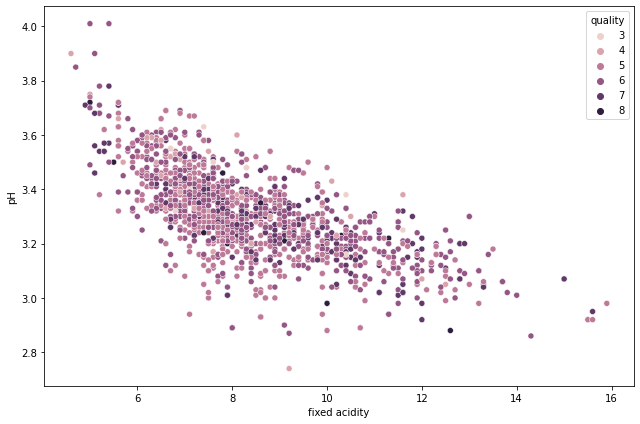

In [36]:
plt.figure(figsize=(9,6))
sns.scatterplot(x='fixed acidity', y= 'pH', data= df, hue='quality')
plt.show()

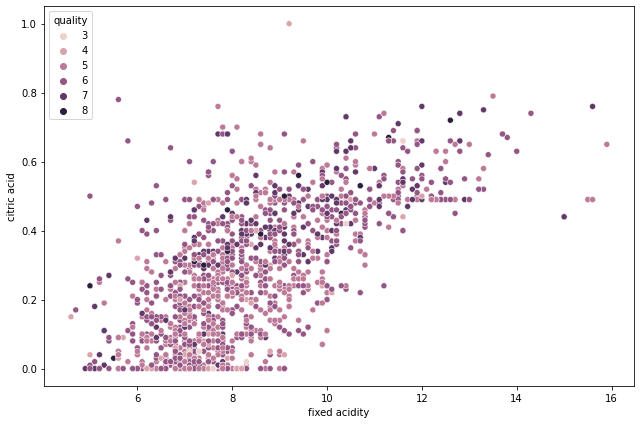

In [37]:
plt.figure(figsize=(9,6))
sns.scatterplot(x='fixed acidity', y= 'citric acid', data= df, hue='quality')
plt.show()

### Feature extraction class of quality of wine

**Now we devide wine qulaity in label vector 1(good) and 0(bad)**
- 1 (good) quality >= 6.5
- 0 (bad) quality < 6.5

In [31]:
def label_vector_design(x):
    if x >= 6.5:
        return 1
    elif x < 6.5 :
        return 0
df['label'] = df['quality'].apply(label_vector_design)

In [38]:
df = df.drop(['rating'], axis=1)

In [40]:
df = df.drop(['quality'], axis=1)

In [41]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  label  
0      9.4      0  
1      9.8      0  
2      9.8      0  
3      9.8      0  
4      9.4      0

<Figure size 1440x1440 with 0 Axes>

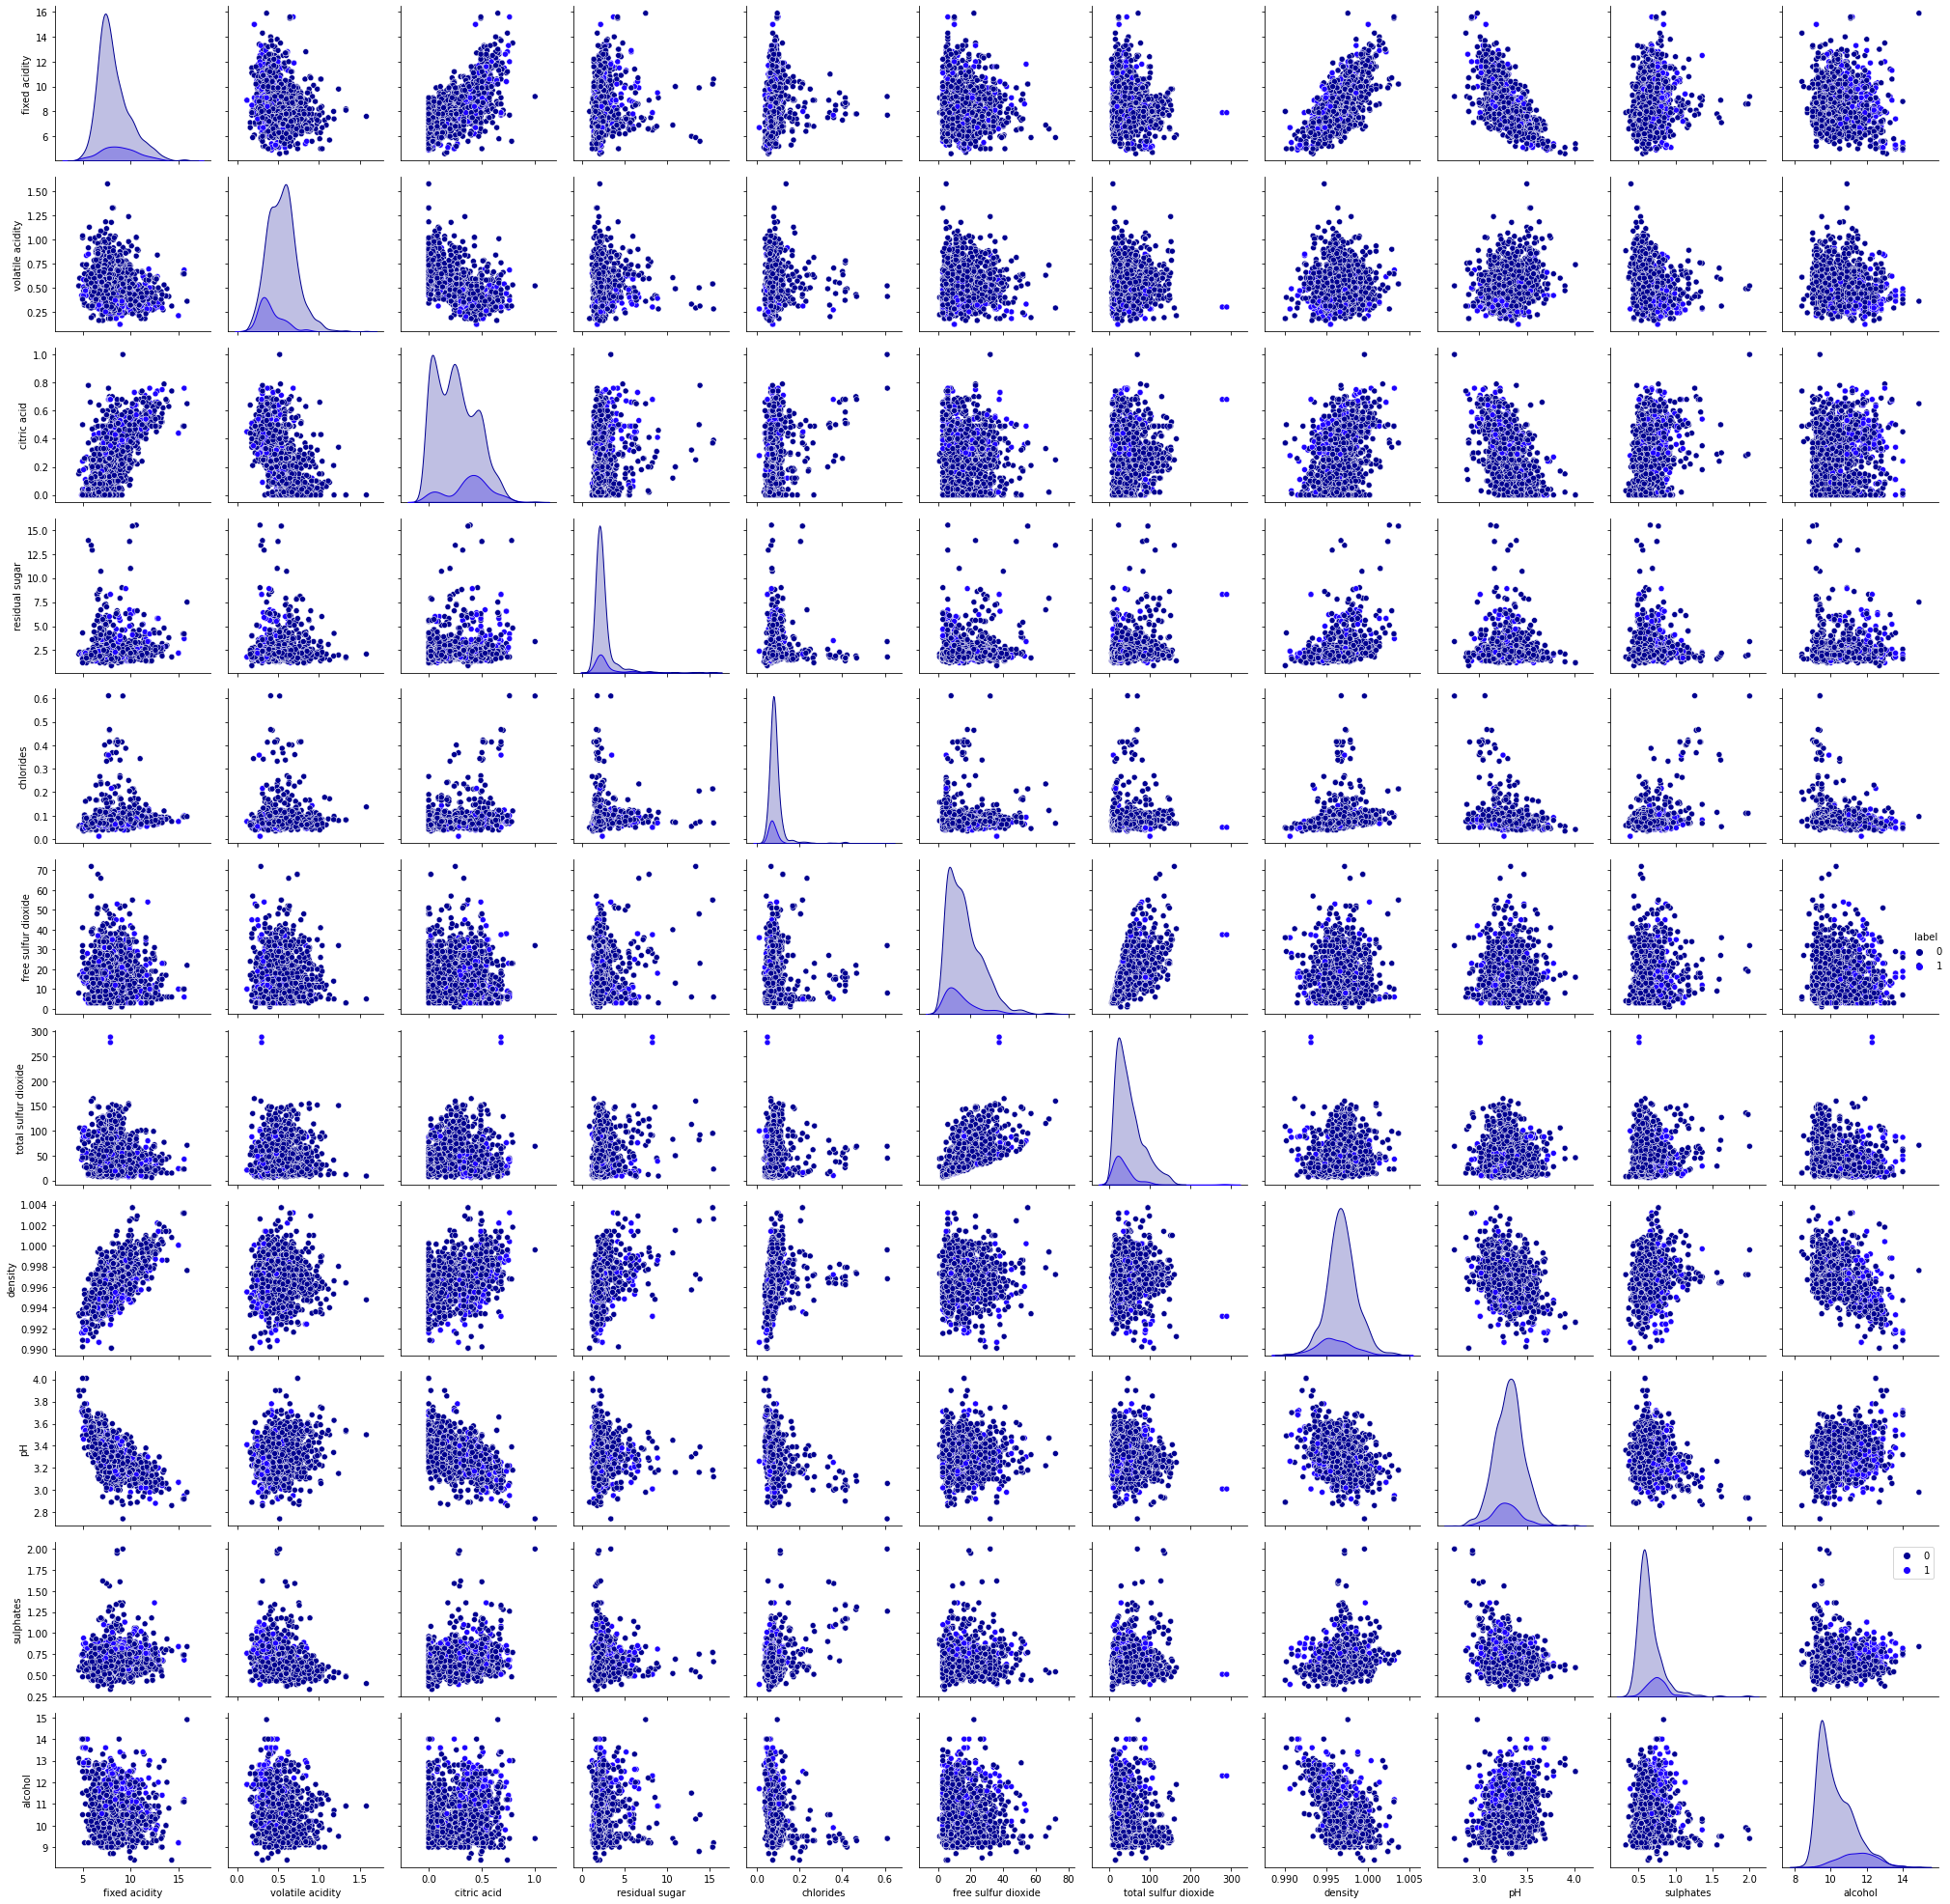

In [42]:
plt.figure(figsize= (20,20))
sns.pairplot(data=df, hue='label')
plt.legend()
plt.tight_layout()
plt.show()

### Correlation Heatmap

In [43]:
df.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
label                      0.120061         -0.270712     0.214716   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
label                       0.047779  -0.097308            -0.071747   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
label                            -0.139517 -0.150460 -0.057283   0.199485   

                       alcohol     label  
fixed acidity        -0.061668  0.120061  
volatile acidity     -0.202288 -0.270712  
citric acid           0.109903  0.214716  
residual sugar        0.042075  0.047779  
chlorides            -0.221141 -0.097308  
free sulfur dioxide  -0.069408 -0.071747  
total sulfur dioxide -0.205654 -0.139517  
density              -0.496180 -0.150460  
pH                    0.205633 -0.057283  
sulphates             0.093595  0.199485  
alcohol               1.000000  0.407315  
label                 0.407315  1.000000

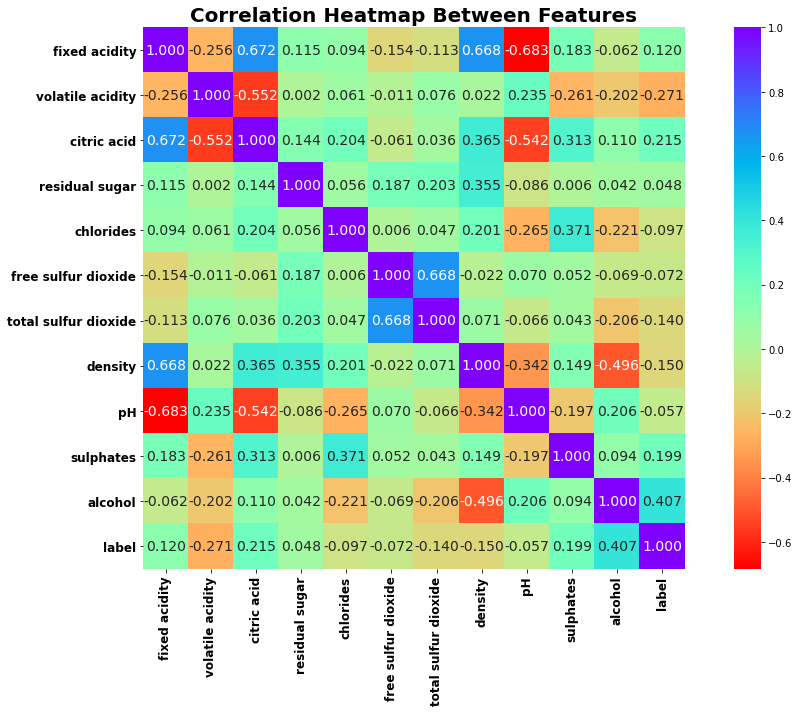

In [45]:
plt.figure(figsize= (14,10))
sns.heatmap(df.corr(), annot= True,fmt='0.3f',square= True, annot_kws={'size':14}, cmap= 'rainbow_r')
plt.title('Correlation Heatmap Between Features',fontsize=20,fontweight ='bold')
plt.xticks(fontsize=12,fontweight ='bold', rotation=90)
plt.yticks(fontsize=12,fontweight ='bold', rotation=0)
plt.tight_layout()
plt.show()

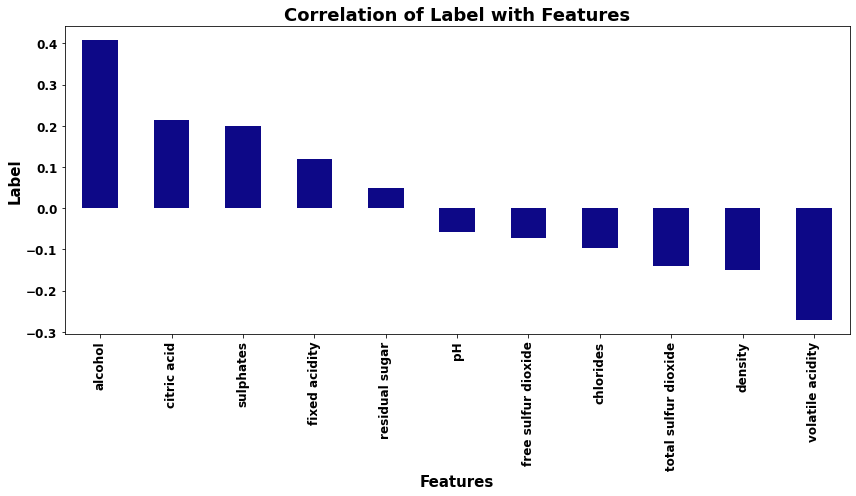

In [48]:
plt.figure(figsize = (12,7))
df.corr()['label'].drop(['label']).sort_values(ascending= False).plot(kind='bar',cmap ='plasma')
plt.xlabel('Features',fontsize=15,fontweight ='bold')
plt.ylabel('Label',fontsize=15,fontweight ='bold')
plt.title('Correlation of Label with Features',fontsize = 18,fontweight ='bold')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

#### Observation:
- **Among all features fixed acidity & citric acid are correlated with coeffient of 0.672 which is highest among all.**
- **free sulfer dioxide and total sulfer dioxide are highly correalted with each other.**
- **Most of feature are moderately or poorly correalted with target variable label.**
- **Residual sugar & ph are very poorly correlated with target feature.**

### Outliers detection & removal

In [50]:
from scipy.stats import zscore
df1=df.copy()
z_score = zscore(df1)
z_score_abs = np.abs(z_score)
df_new= df1[(z_score_abs < 3).all(axis=1)]
df_new.shape

(1458, 12)

In [51]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((1599-1458)/1599)*100,'%')

Percentage Data Loss : 8.818011257035648 %


### Multicollinearity and Skewness Handling

**Skewness of features using distplot**

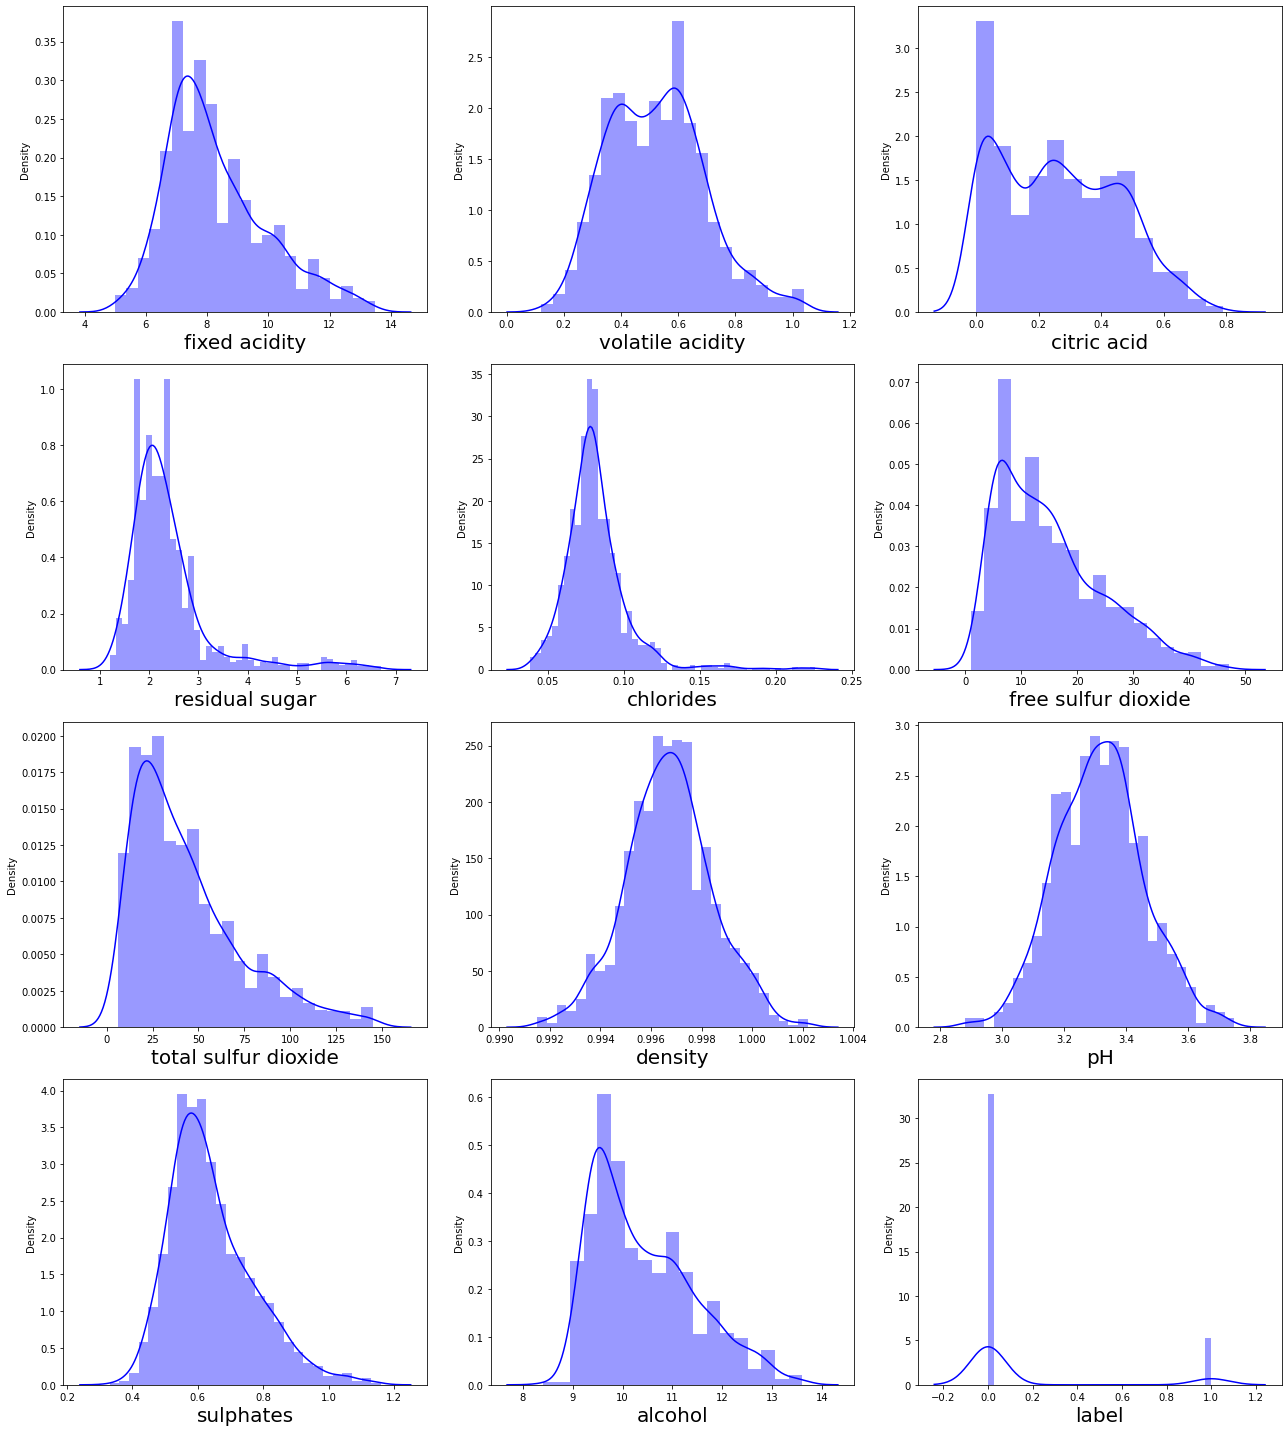

In [54]:
plt.figure(figsize=(18,20), facecolor='white')
plotnumber =1
for column in df_new:
    if plotnumber <=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df_new[column], color='b')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

**Skewness detection and transformation**

In [55]:
df_new.skew()

fixed acidity           0.820879
volatile acidity        0.392097
citric acid             0.292600
residual sugar          2.450707
chlorides               2.307274
free sulfur dioxide     0.869727
total sulfur dioxide    1.185230
density                 0.055543
pH                      0.113039
sulphates               0.893297
alcohol                 0.757396
label                   2.103030
dtype: float64

**Some of the features are highly skewed which need to transform into normal distribution for good quality ML model.**

In [56]:
##Transforming positive or right skew data using boxcox transformation
from scipy.stats import boxcox
df_new['fixed acidity']=boxcox(df_new['fixed acidity'],0)
df_new['residual sugar']=boxcox(df_new['residual sugar'],-1)
df_new['chlorides']=boxcox(df_new['chlorides'],-0.5)
df_new['free sulfur dioxide']=boxcox(df_new['free sulfur dioxide'],0)
df_new['total sulfur dioxide']=boxcox(df_new['total sulfur dioxide'],0)
df_new['sulphates']=boxcox(df_new['sulphates'],0)
df_new['alcohol']=boxcox(df_new['alcohol'],-0.5)

In [58]:
df_new.skew()

fixed acidity           0.377100
volatile acidity        0.392097
citric acid             0.292600
residual sugar          0.129444
chlorides              -0.174196
free sulfur dioxide    -0.300264
total sulfur dioxide   -0.095735
density                 0.055543
pH                      0.113039
sulphates               0.345344
alcohol                 0.508422
label                   2.103030
dtype: float64

- **We can skewness is transform for input features within permissible limit.**

### **Scaling data : Standard Scalar**

In [62]:
X=df_new.drop(columns =['label'])
Y=df_new['label']

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X),columns = X.columns)

In [64]:
X_scaled.shape

(1458, 11)

### **Checking Multicollinearity between features using variance_inflation_factor**

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#data2=data.copy()
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(X_scaled.values,i) for i in range(X_scaled.shape[1])]
vif['Features']= X_scaled.columns
vif

VIF              Features
0   7.784185         fixed acidity
1   1.838793      volatile acidity
2   3.061888           citric acid
3   1.794544        residual sugar
4   1.266907             chlorides
5   2.864392   free sulfur dioxide
6   3.181733  total sulfur dioxide
7   6.605613               density
8   3.313518                    pH
9   1.361099             sulphates
10  3.257735               alcohol

**VIF are within permissible limit.**

## **Machine Learning Model Building**

In [66]:
#Importing Machine learning Model library
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state=67, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (1020, 11)
Training target vector size: (1020,)
Test feature matrix size: (438, 11)
Test target vector size: (438,)


#### **Finding best Random state**

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(50,500):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scaled,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.9246575342465754 on Random_state 133


### **Logistics Regression**

In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state=133, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.9246575342465754


Confusion matrix of Logistics Regression : 
 [[390   5]
 [ 28  15]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       395
           1       0.75      0.35      0.48        43

    accuracy                           0.92       438
   macro avg       0.84      0.67      0.72       438
weighted avg       0.92      0.92      0.91       438



In [73]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(log_reg, X_scaled, Y, cv =5)
print('\033[1m'+'Cross Validation Score', log_reg, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score LogisticRegression() :

CVScore : [0.88013699 0.85616438 0.88356164 0.85223368 0.88316151]
Mean CV Score : 0.8710516405404134
Std deviation : 0.013866786581910373


### **Decision Tree Classifier**

In [74]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
y_pred=dtc.predict(X_test)
print('\033[1m'+'Decision Tree Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Decision Tree Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Decision Tree Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Decision Tree Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Decision Tree Classifier Evaluation


Accuracy Score of Decision Tree Classifier : 0.8744292237442922


Confusion matrix of Decision Tree Classifier : 
 [[364  31]
 [ 24  19]]


classification Report of Decision Tree Classifier 
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       395
           1       0.38      0.44      0.41        43

    accuracy                           0.87       438
   macro avg       0.66      0.68      0.67       438
weighted avg       0.88      0.87      0.88       438



In [75]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(dtc, X_scaled, Y, cv =5)
print('\033[1m'+'Cross Validation Score', dtc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score DecisionTreeClassifier() :

CVScore : [0.85958904 0.81506849 0.84931507 0.75257732 0.79037801]
Mean CV Score : 0.8133855858400414
Std deviation : 0.03912930644126286


### **Random Forest Classifier**

In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state=133, test_size=.3)
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
y_pred=rfc.predict(X_test)
print('\033[1m'+'Random Forest Classifier'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Random Forest Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Random Forest Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Random Forest Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Random Forest Classifier


Accuracy Score of Random Forest Classifier : 0.9360730593607306


Confusion matrix of Random Forest Classifier : 
 [[389   6]
 [ 22  21]]


classification Report of Random Forest Classifier 
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       395
           1       0.78      0.49      0.60        43

    accuracy                           0.94       438
   macro avg       0.86      0.74      0.78       438
weighted avg       0.93      0.94      0.93       438



In [79]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(rfc, X_scaled, Y, cv =5)
print('\033[1m'+'Cross Validation Score', rfc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score RandomForestClassifier() :

CVScore : [0.8869863  0.86986301 0.8630137  0.86941581 0.87285223]
Mean CV Score : 0.8724262109871488
Std deviation : 0.007954943435238053


### **AdaBoost Classifier**

In [80]:
adbc=AdaBoostClassifier()
adbc.fit(X_train,Y_train)
y_pred=adbc.predict(X_test)
print('\033[1m'+'AdaBoost Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of AdaBoost Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of AdaBoost Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of AdaBoost Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

AdaBoost Classifier Evaluation


Accuracy Score of AdaBoost Classifier : 0.9018264840182648


Confusion matrix of AdaBoost Classifier : 
 [[379  16]
 [ 27  16]]


classification Report of AdaBoost Classifier 
               precision    recall  f1-score   support

           0       0.93      0.96      0.95       395
           1       0.50      0.37      0.43        43

    accuracy                           0.90       438
   macro avg       0.72      0.67      0.69       438
weighted avg       0.89      0.90      0.90       438



In [82]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(adbc, X_scaled, Y, cv =5)
print('\033[1m'+'Cross Validation Score',adbc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score AdaBoostClassifier() :

CVScore : [0.88013699 0.84246575 0.8869863  0.81786942 0.8556701 ]
Mean CV Score : 0.8566257119992468
Std deviation : 0.025211162273702445


### **Gradient Boosting Classifier**

In [83]:
grad_bc=GradientBoostingClassifier()
grad_bc.fit(X_train,Y_train)
y_pred=grad_bc.predict(X_test)
print('\033[1m'+'Gradient Boosting Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Gradient Boosting Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Gradient Boosting Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Gradient Boosting Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Gradient Boosting Classifier Evaluation


Accuracy Score of Gradient Boosting Classifier : 0.9223744292237442


Confusion matrix of Gradient Boosting Classifier : 
 [[382  13]
 [ 21  22]]


classification Report of Gradient Boosting Classifier 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       395
           1       0.63      0.51      0.56        43

    accuracy                           0.92       438
   macro avg       0.79      0.74      0.76       438
weighted avg       0.92      0.92      0.92       438



In [84]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(grad_bc, X_scaled, Y, cv =5)
print('\033[1m'+'Cross Validation Score', grad_bc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score GradientBoostingClassifier() :

CVScore : [0.89041096 0.8390411  0.88356164 0.83505155 0.88316151]
Mean CV Score : 0.8662453514098762
Std deviation : 0.02401296336921838


**We can see that  RandomForestClassifier() gives us good Accuracy and maximum f1 score along with best Cross-validation score.**

***We will apply Hyperparameter tuning on Random Forest model and Used it as final model.***

## **Hyper Parameter Tuning : GridSearchCV**

In [85]:
from sklearn.model_selection import GridSearchCV

In [86]:
parameters = { 'max_depth': [10, 30, 50,100 ],
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [50,75, 100,150]}

In [88]:
GCV = GridSearchCV(RandomForestClassifier(),parameters,cv=3,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV 1/3; 1/64] START criterion=gini, max_depth=10, max_features=auto, n_estimators=50
[CV 1/3; 1/64] END criterion=gini, max_depth=10, max_features=auto, n_estimators=50;, score=0.888 total time=   0.1s
[CV 2/3; 1/64] START criterion=gini, max_depth=10, max_features=auto, n_estimators=50
[CV 2/3; 1/64] END criterion=gini, max_depth=10, max_features=auto, n_estimators=50;, score=0.894 total time=   0.1s
[CV 3/3; 1/64] START criterion=gini, max_depth=10, max_features=auto, n_estimators=50
[CV 3/3; 1/64] END criterion=gini, max_depth=10, max_features=auto, n_estimators=50;, score=0.915 total time=   0.1s
[CV 1/3; 2/64] START criterion=gini, max_depth=10, max_features=auto, n_estimators=75
[CV 1/3; 2/64] END criterion=gini, max_depth=10, max_features=auto, n_estimators=75;, score=0.879 total time=   0.2s
[CV 2/3; 2/64] START criterion=gini, max_depth=10, max_features=auto, n_estimators=75
[CV 2/3; 2/64] END criterion=gini, max_d

[CV 2/3; 14/64] END criterion=gini, max_depth=30, max_features=log2, n_estimators=75;, score=0.891 total time=   0.2s
[CV 3/3; 14/64] START criterion=gini, max_depth=30, max_features=log2, n_estimators=75
[CV 3/3; 14/64] END criterion=gini, max_depth=30, max_features=log2, n_estimators=75;, score=0.909 total time=   0.2s
[CV 1/3; 15/64] START criterion=gini, max_depth=30, max_features=log2, n_estimators=100
[CV 1/3; 15/64] END criterion=gini, max_depth=30, max_features=log2, n_estimators=100;, score=0.882 total time=   0.3s
[CV 2/3; 15/64] START criterion=gini, max_depth=30, max_features=log2, n_estimators=100
[CV 2/3; 15/64] END criterion=gini, max_depth=30, max_features=log2, n_estimators=100;, score=0.897 total time=   0.3s
[CV 3/3; 15/64] START criterion=gini, max_depth=30, max_features=log2, n_estimators=100
[CV 3/3; 15/64] END criterion=gini, max_depth=30, max_features=log2, n_estimators=100;, score=0.903 total time=   0.3s
[CV 1/3; 16/64] START criterion=gini, max_depth=30, max_

[CV 3/3; 27/64] END criterion=gini, max_depth=100, max_features=auto, n_estimators=100;, score=0.906 total time=   0.4s
[CV 1/3; 28/64] START criterion=gini, max_depth=100, max_features=auto, n_estimators=150
[CV 1/3; 28/64] END criterion=gini, max_depth=100, max_features=auto, n_estimators=150;, score=0.882 total time=   0.6s
[CV 2/3; 28/64] START criterion=gini, max_depth=100, max_features=auto, n_estimators=150
[CV 2/3; 28/64] END criterion=gini, max_depth=100, max_features=auto, n_estimators=150;, score=0.891 total time=   0.7s
[CV 3/3; 28/64] START criterion=gini, max_depth=100, max_features=auto, n_estimators=150
[CV 3/3; 28/64] END criterion=gini, max_depth=100, max_features=auto, n_estimators=150;, score=0.909 total time=   0.5s
[CV 1/3; 29/64] START criterion=gini, max_depth=100, max_features=log2, n_estimators=50
[CV 1/3; 29/64] END criterion=gini, max_depth=100, max_features=log2, n_estimators=50;, score=0.897 total time=   0.1s
[CV 2/3; 29/64] START criterion=gini, max_dept

[CV 3/3; 40/64] END criterion=entropy, max_depth=10, max_features=log2, n_estimators=150;, score=0.897 total time=   0.4s
[CV 1/3; 41/64] START criterion=entropy, max_depth=30, max_features=auto, n_estimators=50
[CV 1/3; 41/64] END criterion=entropy, max_depth=30, max_features=auto, n_estimators=50;, score=0.891 total time=   0.1s
[CV 2/3; 41/64] START criterion=entropy, max_depth=30, max_features=auto, n_estimators=50
[CV 2/3; 41/64] END criterion=entropy, max_depth=30, max_features=auto, n_estimators=50;, score=0.891 total time=   0.1s
[CV 3/3; 41/64] START criterion=entropy, max_depth=30, max_features=auto, n_estimators=50
[CV 3/3; 41/64] END criterion=entropy, max_depth=30, max_features=auto, n_estimators=50;, score=0.900 total time=   0.1s
[CV 1/3; 42/64] START criterion=entropy, max_depth=30, max_features=auto, n_estimators=75
[CV 1/3; 42/64] END criterion=entropy, max_depth=30, max_features=auto, n_estimators=75;, score=0.882 total time=   0.2s
[CV 2/3; 42/64] START criterion=en

[CV 3/3; 53/64] END criterion=entropy, max_depth=50, max_features=log2, n_estimators=50;, score=0.900 total time=   0.1s
[CV 1/3; 54/64] START criterion=entropy, max_depth=50, max_features=log2, n_estimators=75
[CV 1/3; 54/64] END criterion=entropy, max_depth=50, max_features=log2, n_estimators=75;, score=0.900 total time=   0.2s
[CV 2/3; 54/64] START criterion=entropy, max_depth=50, max_features=log2, n_estimators=75
[CV 2/3; 54/64] END criterion=entropy, max_depth=50, max_features=log2, n_estimators=75;, score=0.894 total time=   0.2s
[CV 3/3; 54/64] START criterion=entropy, max_depth=50, max_features=log2, n_estimators=75
[CV 3/3; 54/64] END criterion=entropy, max_depth=50, max_features=log2, n_estimators=75;, score=0.924 total time=   0.2s
[CV 1/3; 55/64] START criterion=entropy, max_depth=50, max_features=log2, n_estimators=100
[CV 1/3; 55/64] END criterion=entropy, max_depth=50, max_features=log2, n_estimators=100;, score=0.891 total time=   0.3s
[CV 2/3; 55/64] START criterion=e

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 30, 50, 100],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [50, 75, 100, 150]},
             verbose=10)

In [89]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 50,
 'max_features': 'log2',
 'n_estimators': 75}

## **Final Model**

In [90]:
Final_mod = RandomForestClassifier(criterion='entropy',max_depth = 50,n_estimators= 75,max_features='log2')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Final Random Forest Classifier Model'+'\033[0m')
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Random Forest Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'Classification Report of Random Forest Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Final Random Forest Classifier Model
Accuracy Score :
 0.9315068493150684


Confusion matrix of Random Forest Classifier : 
 [[385  10]
 [ 20  23]]


Classification Report of Random Forest Classifier 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       395
           1       0.70      0.53      0.61        43

    accuracy                           0.93       438
   macro avg       0.82      0.75      0.78       438
weighted avg       0.93      0.93      0.93       438



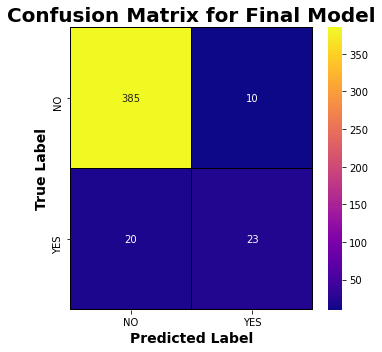

In [92]:
# Lets plot confusion matrix for  FinalModel
cm = confusion_matrix(Y_test, y_pred)

x_labels = ["NO","YES"]
y_labels = ["NO","YES"]

fig , ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, 
            cmap="plasma", xticklabels = x_labels, yticklabels = y_labels)

plt.xlabel("Predicted Label",fontsize=14,fontweight='bold')
plt.ylabel("True Label",fontsize=14,fontweight='bold')
plt.title('Confusion Matrix for Final Model',fontsize=20,fontweight='bold')
plt.show()

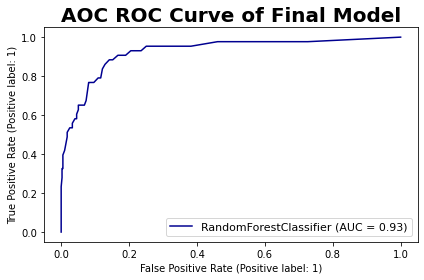

Auc Score :
 0.754783632617015


In [95]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(Final_mod,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.title('AOC ROC Curve of Final Model',fontsize=20,fontweight='bold')
plt.show()
print('='*100)
auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

## Saving model

In [96]:
import joblib
joblib.dump(Final_mod,'Red_Wine_quality_Prediction.pkl')

['Red_Wine_quality_Prediction.pkl']